In [4]:
from langgraph.graph import StateGraph , START, END
from typing import TypedDict

In [11]:
class BmiState(TypedDict):
    height: float  # in meters
    weight: float  # in kilograms
    bmi: float     # body mass index
    category: str  # BMI category

In [12]:
def Calculate_bmi(state: BmiState) -> BmiState:
    height = state["height"]
    weight = state["weight"]
    bmi = weight / (height ** 2)
    state["bmi"] = bmi
    return state


def label_bmi(state: BmiState) -> BmiState:
    bmi = state["bmi"]
    if bmi < 18.5:
        category = "Underweight"
    elif 18.5 <= bmi < 24.9:
        category = "Normal weight"
    elif 25 <= bmi < 29.9:
        category = "Overweight"
    else:
        category = "Obesity"
    state["category"] = category
    
    return state


In [13]:
graph=StateGraph(BmiState)

graph.add_node("Calculate BMI",Calculate_bmi)
graph.add_node("Label BMI",label_bmi)

graph.add_edge(START,"Calculate BMI")
graph.add_edge("Calculate BMI","Label BMI")
graph.add_edge("Label BMI",END)

workflow=graph.compile()


In [14]:
initial_state={"weight":60,"height":1.72}
final_state=workflow.invoke(initial_state)
print(final_state)

{'height': 1.72, 'weight': 60, 'bmi': 20.281233098972418, 'category': 'Normal weight'}


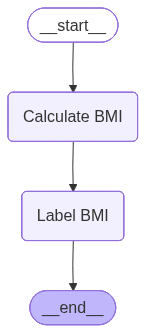

In [15]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())